In [4]:
import numpy as np
import pandas as pd

In [5]:
t = '2019-10-25'

Python packages: `datetime` and `dateutil`

In [7]:
import datetime

In [16]:
### timestamp
some_day = datetime.datetime(year=2019, month=10, day=25)
other_day = datetime.datetime(year=2019, month=12, day=31)

In [14]:
### timedelta = a difference between two timestamps
some_diff = datetime.timedelta(10)

In [15]:
some_day + some_diff

datetime.datetime(2019, 11, 4, 0, 0)

In [17]:
other_day - some_day

datetime.timedelta(67)

In [28]:
some_day.strftime("This is in year %Y.  Today is %B %dth.  It is %A in this week.")

'This is in year 2019.  Today is October 25th.  It is Friday in this week.'

In [25]:
some_day.strftime

In [29]:
birth_day = datetime.datetime(year=1987, month=3, day=21)

In [30]:
birth_day.strftime("%A")

'Saturday'

In [31]:
import dateutil

In [32]:
dateutil.parser.parse('20201010')

datetime.datetime(2020, 10, 10, 0, 0)

In [34]:
dateutil.parser.parse('2020-10-10')

datetime.datetime(2020, 10, 10, 0, 0)

In [35]:
dateutil.parser.parse('2019, October 25')

datetime.datetime(2019, 10, 25, 0, 0)

In [36]:
dateutil.parser.parse('October 25, 2019')

datetime.datetime(2019, 10, 25, 0, 0)

Numpy: `datetime64` and `timedelta64`

In [37]:
import numpy as np

In [40]:
some_day = np.datetime64('2019-10-25')
some_day

numpy.datetime64('2019-10-25')

In [41]:
some_diff = np.timedelta64('10')

In [42]:
some_day + some_diff

numpy.datetime64('2019-11-04')

In [43]:
some_day + np.arange(10)

array(['2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
       '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
       '2019-11-02', '2019-11-03'], dtype='datetime64[D]')

Pandas: `to_datetime`, `to_timedelta`, and `date_range`

In [44]:
import pandas as pd

In [46]:
some_day = pd.to_datetime('2019-10-25')
some_day

Timestamp('2019-10-25 00:00:00')

In [48]:
some_day = pd.to_datetime('Oct 25, 2019')
some_day

Timestamp('2019-10-25 00:00:00')

In [52]:
some_diff = pd.to_timedelta(10, unit='d')

In [53]:
some_day + some_diff

Timestamp('2019-11-04 00:00:00')

In [54]:
s = pd.Series(['2019-10-25',
              '2019-10-26',
              '2019-10-27'])
s

0    2019-10-25
1    2019-10-26
2    2019-10-27
dtype: object

In [55]:
pd.to_datetime(s)

0   2019-10-25
1   2019-10-26
2   2019-10-27
dtype: datetime64[ns]

In [56]:
s = pd.date_range?

In [59]:
s = pd.date_range('2019-10-25','2019-11-4', freq='D')
s

DatetimeIndex(['2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03', '2019-11-04'],
              dtype='datetime64[ns]', freq='D')

In [61]:
prices = 200 + np.arange(11) + np.random.randn(11)

In [62]:
TSM = pd.Series(prices, 
               index=s)
TSM

2019-10-25    199.834385
2019-10-26    201.640913
2019-10-27    201.499231
2019-10-28    203.462227
2019-10-29    202.482018
2019-10-30    203.763600
2019-10-31    205.940757
2019-11-01    206.729322
2019-11-02    206.508707
2019-11-03    207.543906
2019-11-04    212.166298
Freq: D, dtype: float64

In [67]:
TSM.index.strftime("%A")

Index(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object')

In [69]:
TSM['2019-10-25':'2019-11-01']

2019-10-25    199.834385
2019-10-26    201.640913
2019-10-27    201.499231
2019-10-28    203.462227
2019-10-29    202.482018
2019-10-30    203.763600
2019-10-31    205.940757
2019-11-01    206.729322
Freq: D, dtype: float64

In [71]:
TSM['2019-10']

2019-10-25    199.834385
2019-10-26    201.640913
2019-10-27    201.499231
2019-10-28    203.462227
2019-10-29    202.482018
2019-10-30    203.763600
2019-10-31    205.940757
Freq: D, dtype: float64

`eval()` and `query()`

In [1]:
import numpy as np
import pandas as pd

In [8]:
df1 = pd.DataFrame(np.random.randn(100000, 100))
df2 = pd.DataFrame(np.random.randn(100000, 100))
df3 = pd.DataFrame(np.random.randn(100000, 100))
df4 = pd.DataFrame(np.random.randn(100000, 100))

df1.shape

(100000, 100)

In [9]:
%%timeit

df1 + df2 + df3 + df4

1 loop, best of 3: 146 ms per loop


In [ ]:
tem1 = df1 + df2
tem2 = tem1 + df3
tem3 = tem2 + df4

In [10]:
%%timeit

pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 3: 147 ms per loop


`+`, `-`, `*`, `/`, ...

In [11]:
pd.eval('df1 + df2 - df3 / df4')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.062187,2.652629,4.980300,2.139690,-1.602544,-0.627224,-2.215872,1.320299,10.684332,-0.312572,...,-4.378124,-4.848419,0.519658,1.753211,74.898305,-3.897641,0.170642,1.655469,-3.246920,0.924213
1,-0.816783,-0.655444,-5.973452,0.267592,51.537249,0.189146,2.407347,0.037959,-3.983387,1.581811,...,-2.312995,791.369899,-0.454800,0.884469,-6.572774,-7.780174,7.560844,-2.632137,3.652286,2.291073
2,0.969070,-2.644673,-1.512008,0.965527,0.625778,2.259248,-0.923807,-1.181028,-0.601291,2.315596,...,0.348154,3.590523,-3.904637,-1.166786,0.182846,-0.979982,3.865090,-0.850729,-3.379885,-1.008932
3,4.976576,-0.985036,-0.474501,-0.665369,2.175882,-7.454850,0.180508,6.783729,-1.628206,-0.641968,...,-0.977737,0.677885,0.245173,-0.074130,1.689288,0.715807,2.676736,2.514096,-6.152811,-3.214402
4,-1.336823,-7.797253,0.273747,2.390426,8.091452,-5.757350,1.305063,1.775400,-0.649304,-3.123965,...,0.926734,0.769919,-9.567607,-2.492863,-0.923274,1.449439,-1.958739,1.827754,0.412697,3.217012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.089232,-6.936742,1.259896,1.033288,-2.030108,0.388080,1.332277,0.539227,-1.128019,-1.473425,...,-18.571773,0.090512,-1.866536,3.711762,-1.009828,-1.107419,0.063171,0.532609,-13.858761,-69.211219
99996,10.920879,1.740719,-0.055152,-0.051854,-9.810960,-1.353868,2.217714,0.160597,-0.017868,0.554034,...,5.368351,0.409813,-2.380903,0.394155,-0.159474,-5.868232,-1.791293,-1.704740,0.948516,-1.846769
99997,-1.625064,-0.626945,-0.287079,0.674776,0.950174,-2.685941,-0.692071,-1.840357,-3.188209,-1.091987,...,1.350714,0.709999,0.504739,0.989039,-3.476572,3.838271,-1.278188,-2.640193,-0.517498,9.784832
99998,-0.014597,1.007785,-21.095094,3.593985,-2.082536,2.382687,1.689739,-2.675452,1.605033,-7.751373,...,1.505546,-0.652271,-157.516054,-0.421702,-1.110249,-0.912743,3.980201,-6.774522,-3.357197,0.835255


In [15]:
df = pd.DataFrame(np.random.randn(100,4), 
                 columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.468116,0.727914,-1.042124,1.532085
1,-0.335058,1.066467,-0.005903,0.069709
2,-0.336378,0.153801,0.187738,0.063746
3,-0.379191,0.479328,-0.241734,-0.580085
4,0.639351,-1.504349,0.561449,1.120917


In [17]:
df.A ### df['A']

0     0.468116
1    -0.335058
2    -0.336378
3    -0.379191
4     0.639351
        ...   
95   -2.237527
96    0.628829
97    0.223733
98   -0.704893
99   -0.518390
Name: A, Length: 100, dtype: float64

In [18]:
pd.eval(' df.A + df.B + df.C + df.D ')

0     1.685991
1     0.795214
2     0.068906
3    -0.721683
4     0.817368
        ...   
95    0.886191
96   -0.251228
97    0.473100
98   -0.355611
99    0.301006
Length: 100, dtype: float64

In [21]:
df.eval(' A + B + C + D ')

0     1.685991
1     0.795214
2     0.068906
3    -0.721683
4     0.817368
        ...   
95    0.886191
96   -0.251228
97    0.473100
98   -0.355611
99    0.301006
Length: 100, dtype: float64

`query()`

In [24]:
df[ df.A > 0 ]

,A,B,C,D
0,0.468116,0.727914,-1.042124,1.532085
4,0.639351,-1.504349,0.561449,1.120917
5,1.139319,0.880233,-2.121008,0.094869
7,1.797316,1.320260,0.842888,1.640422
8,0.896035,-0.302972,-1.283640,0.478745
10,0.339444,-0.522488,-0.249035,1.732643
12,0.421559,1.829282,-0.465249,-0.419592
13,0.863134,0.221408,-0.512303,0.561401
15,0.456254,-0.270838,1.865521,-0.635997
16,0.585512,-0.521221,1.415940,0.057755


In [25]:
df.query(' A > 0 ')

,A,B,C,D
0,0.468116,0.727914,-1.042124,1.532085
4,0.639351,-1.504349,0.561449,1.120917
5,1.139319,0.880233,-2.121008,0.094869
7,1.797316,1.320260,0.842888,1.640422
8,0.896035,-0.302972,-1.283640,0.478745
10,0.339444,-0.522488,-0.249035,1.732643
12,0.421559,1.829282,-0.465249,-0.419592
13,0.863134,0.221408,-0.512303,0.561401
15,0.456254,-0.270838,1.865521,-0.635997
16,0.585512,-0.521221,1.415940,0.057755


In [2]:
import matplotlib.pyplot as plt
import numpy as np

`plt.plot([x coordinates], [y coordinates])`

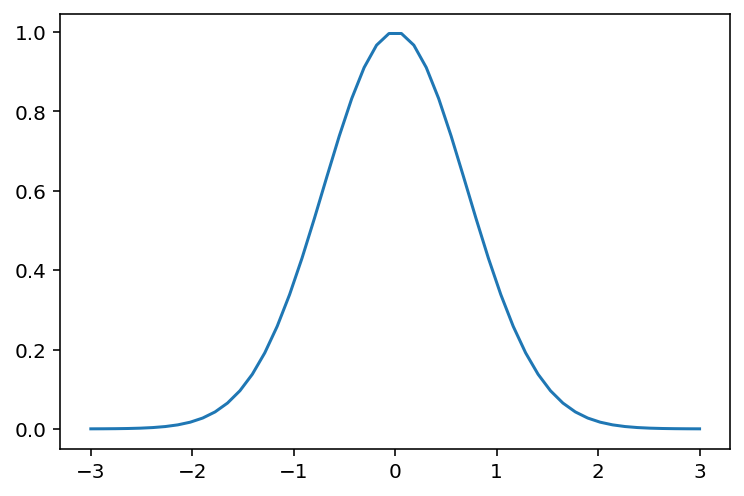

In [3]:
x = np.linspace(-3,3,50)
y = np.exp(-x**2)
plt.plot(x, y)

`plt.scatter(x, y)`

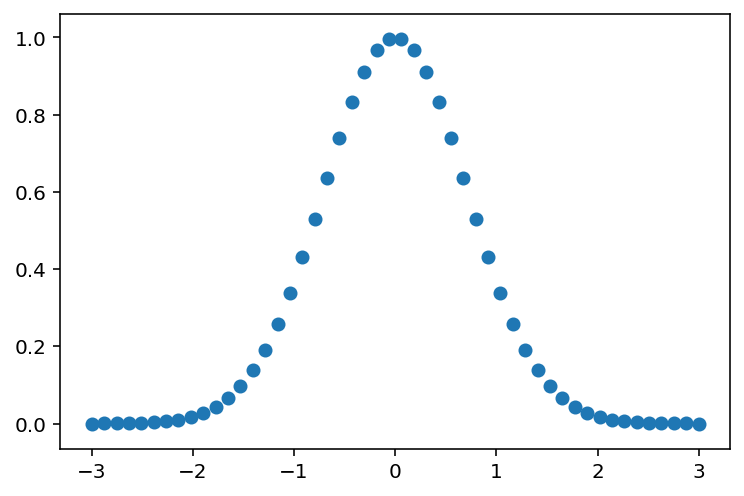

In [35]:
x = np.linspace(-3,3,50)
y = np.exp(-x**2)
plt.scatter(x, y)

`plt.hist( [lots of samples] )`

(array([  1.,   0.,   4.,   4.,   4.,  11.,  19.,  19.,  14.,  33.,  57.,
         59.,  88., 116., 132., 193., 230., 276., 319., 387., 409., 444.,
        464., 567., 576., 526., 579., 544., 527., 513., 454., 418., 412.,
        305., 289., 237., 184., 138., 121.,  87.,  66.,  54.,  39.,  21.,
         26.,  13.,   6.,   8.,   2.,   5.]),
 array([-3.69498765, -3.55372045, -3.41245325, -3.27118605, -3.12991885,
        -2.98865165, -2.84738445, -2.70611725, -2.56485005, -2.42358285,
        -2.28231565, -2.14104845, -1.99978125, -1.85851405, -1.71724685,
        -1.57597965, -1.43471245, -1.29344525, -1.15217805, -1.01091085,
        -0.86964365, -0.72837645, -0.58710925, -0.44584205, -0.30457485,
        -0.16330765, -0.02204045,  0.11922675,  0.26049395,  0.40176115,
         0.54302835,  0.68429555,  0.82556275,  0.96682995,  1.10809715,
         1.24936435,  1.39063155,  1.53189875,  1.67316595,  1.81443314,
         1.95570034,  2.09696754,  2.23823474,  2.37950194,  2.52076914,
 

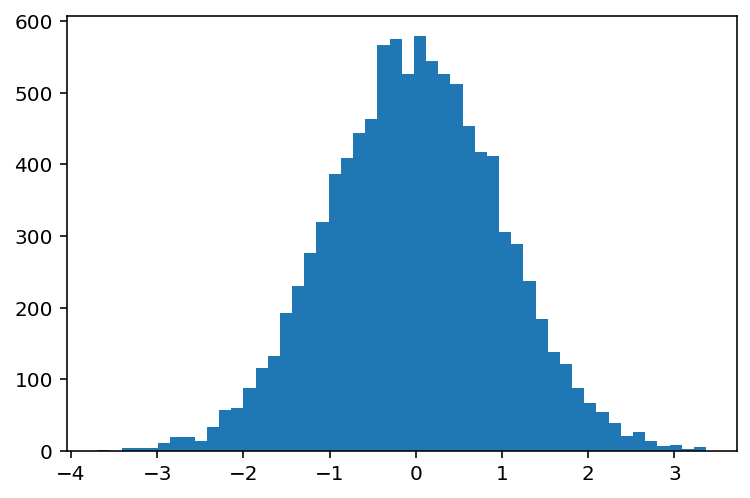

In [42]:
dist = np.random.randn(10000)
plt.hist(dist, bins=50)

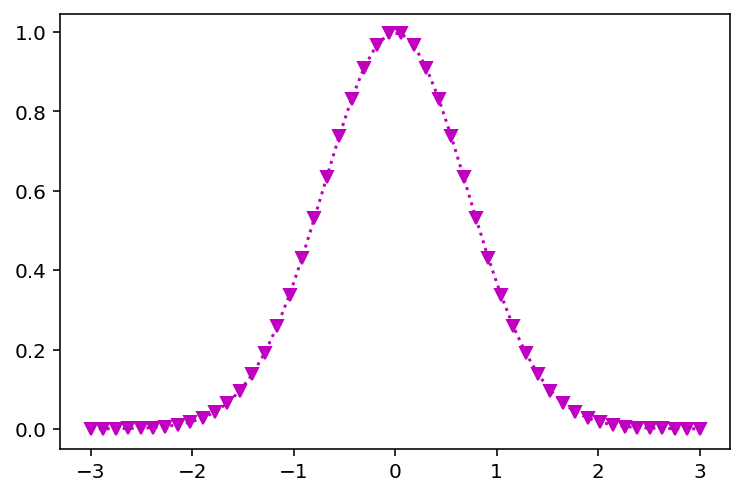

In [14]:
plt.plot(x, y, 'mv:')